# Scatter Plot Using Matplotlib and Seaborn

**Scatter Plots are for quantitative variable v.s. quantitative variable**

[1. Scatter Plot in Matplotlib]()

[2. Scatter Plot in Seaborn]()

[3. OverPlotting Problem]()

- [Sampling Technique]()
- [Transparency Technique]()
- [Jitter Techinique]()
- [Combination of Transparentcy and Jitter]()

In [1]:
import os
os.chdir("projects_on_GitHub/data_viz/Visualization_with_mpl_and_sns")

In [4]:
# 导入数据
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### 1. Use `plt.scatter()` to draw a scatter plot.

#### Example 1. Study the relationship between `displacement` and `fuel efficiency` of cars.

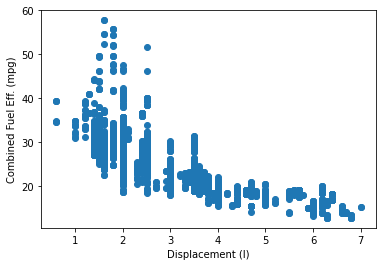

In [5]:
# 利用plt.scatter()绘制散点图
plt.scatter(data=fuel_econ, x='displ', y='comb')

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### 2. Use seaborn's regplot to draw scatter plot with regression line.

#### Example 2. Study the relationship between `displacement` and `fuel efficiency` of cars.

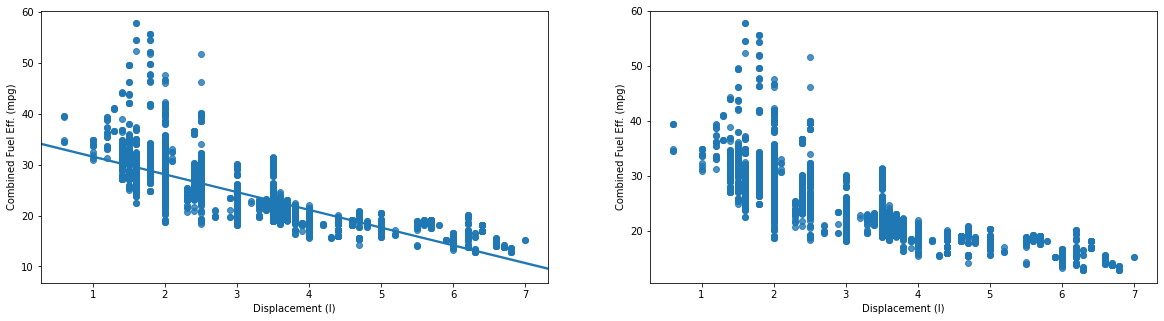

In [8]:
plt.figure(figsize=(20,5))

# With regression line
plt.subplot(1, 2, 1)
sns.regplot(data=fuel_econ, x='displ', y='comb', truncate=False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# Without regression line
plt.subplot(1, 2, 2)
sns.regplot(data=fuel_econ, x='displ', y='comb', fit_reg=False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

#### Example 3. Study the relationship between `displacement` and `fuel efficiency` of cars on transformed scale.

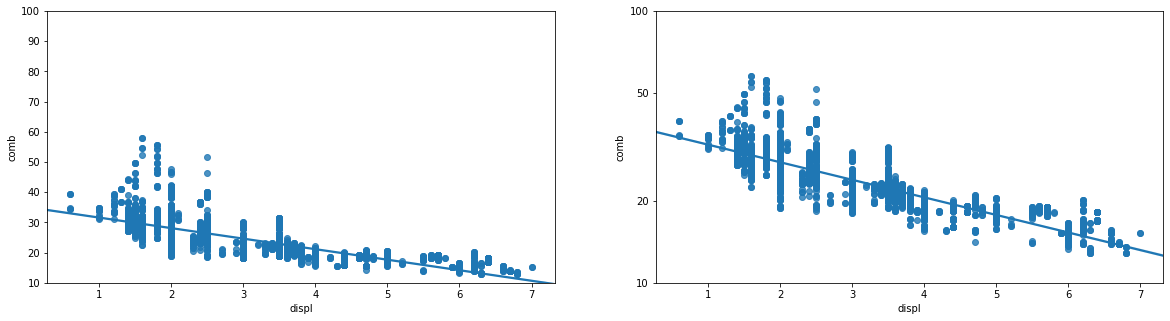

In [12]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.regplot(x=fuel_econ['displ'], y=fuel_econ['comb'], truncate=False)
plt.ylim((10, 100));

    
plt.subplot(1,2,2)
sns.regplot(x=fuel_econ['displ'], y=fuel_econ['comb'].apply(log_trans), truncate=False)
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

### 3. Overplotting Problems

#### I. Sampling Technique

#### II. Jitter Technique

#### Example 1. Study the data distribution of `efficiency` along with `years`.

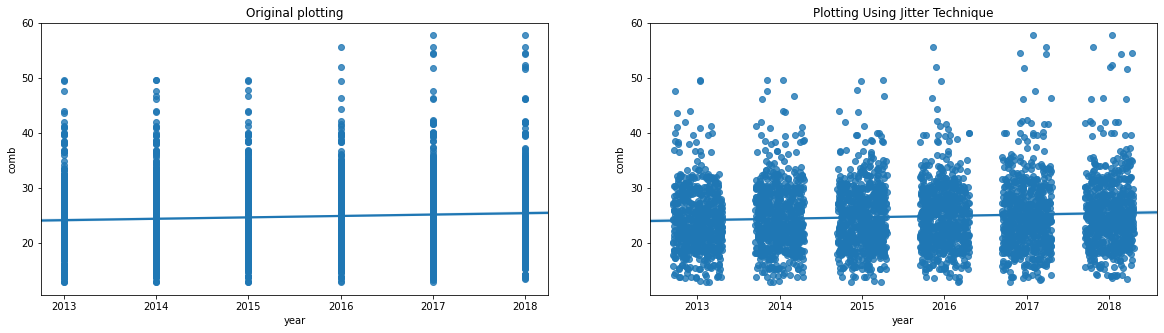

In [14]:
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False)
plt.title('Original plotting');

# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)

sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3)
plt.title('Plotting Using Jitter Technique');

**Try with different x_jitter values.**

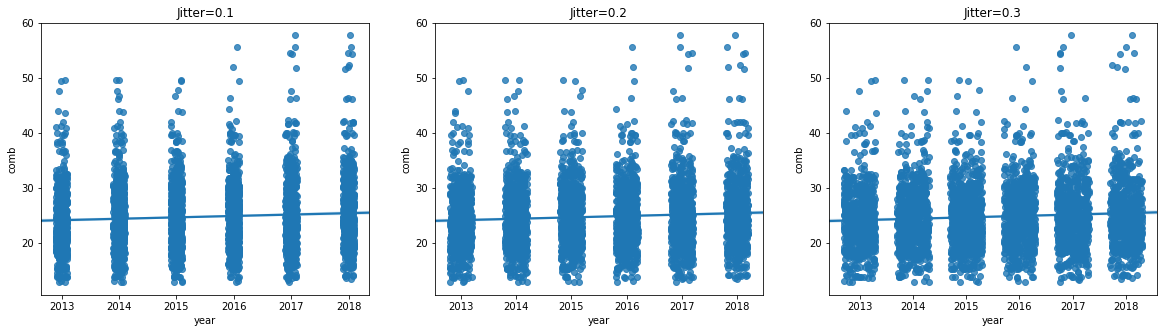

In [19]:
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])

for i in [1, 2, 3]:
    plt.subplot(1, 3, i)
    sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=i/10)
    plt.title("Jitter=0.{}".format(i));